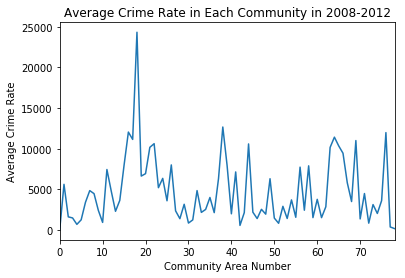

In [6]:
%matplotlib inline

import pandas as pd
import json
import requests
from urllib.parse import quote

# Get crime data 
soql = "https://data.cityofchicago.org/resource/6zsd-86xi.json?$query="
soql += quote("SELECT community_area AS Community, count(*)/5 AS Crime_Rate ")
soql += quote("WHERE 2007 < year AND year < 2013 ")
soql += quote("GROUP BY Community LIMIT 10000")

resp = requests.get(soql).json()

crime_total = pd.DataFrame(resp)

# Get rid of the redundant decimal places 
crime_total.Crime_Rate = crime_total.Crime_Rate.astype(float)
crime_total.round(1) 

# Make a graph to show the disparity among the crime rate for each community 
ax = crime_total["Crime_Rate"].plot()
ax.set_xlabel("Community Area Number")
ax.set_ylabel("Average Crime Rate")  
ax.set_title("Average Crime Rate in Each Community in 2008-2012")

ax.figure.savefig("Average_Total_Crime.pdf")


In [23]:
# Rank the communities according to the crime rate 
# Use the socioeconomics data to get the community name 

socioeconomics = pd.read_csv("Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv", index_col = ['Community Area Number'])
crime_total.rename(columns={'Community':'Community Area Number'}, inplace = True)
crime_total.set_index('Community Area Number')

mix_total = pd.DataFrame.join(crime_total, socioeconomics)
mix_total_new = mix_total[['Community Area Number','COMMUNITY AREA NAME','Crime_Rate']]

mix_total_rank = mix_total_new.sort_values('Crime_Rate', ascending = False) 
mix_total_rank

,Community Area Number,COMMUNITY AREA NAME,Crime_Rate
18,25,Montclaire,24329.0
38,43,Grand Boulevard,12667.4
16,23,Irving Park,12045.6
76,8,O'Hare,11979.2
64,67,Clearing,11419.4
17,24,Dunning,11141.2
69,71,Greater Grand Crossing,11000.0
22,29,Logan Square,10617.0
44,49,Chatham,10585.6
65,68,West Lawn,10347.8


In [25]:
# Curious about the number of incidents per day for the top ten "dangerous" communities

mix_total_perday = mix_total_rank.assign(Crime_Rate_Perday = mix_total_new["Crime_Rate"]/365) 
mix_total_perday.head(10) 

,Community Area Number,COMMUNITY AREA NAME,Crime_Rate,Crime_Rate_Perday
18,25,Montclaire,24329.0,66.654795
38,43,Grand Boulevard,12667.4,34.705205
16,23,Irving Park,12045.6,33.001644
76,8,O'Hare,11979.2,32.819726
64,67,Clearing,11419.4,31.286027
17,24,Dunning,11141.2,30.523836
69,71,Greater Grand Crossing,11000.0,30.136986
22,29,Logan Square,10617.0,29.087671
44,49,Chatham,10585.6,29.001644
65,68,West Lawn,10347.8,28.350137


In [ ]:
# Would like to show the information on a Chicago map 
